# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Aditya Mulya Pratama
- **Email:** adityamulya871@gmail.com
- **ID Dicoding:** aditya_mulya_pratama

## Menentukan Pertanyaan Bisnis

- Jam berapa nilai kualitas udara berdasarkan terbaik dan terburuk di kota changping ? Berikan tren
- Pada hari atau tanggal berapa nilai kualitas udara terbaik dan terburuk ? berikan tren
- Pada bulan berapa nilai kualitas udara terbaik dan terburuk ? berikan tren
- Tahun berapa yang memiliki kualiatas udara paling baik ? Berikan tren
- Bagaimana korelasi anatara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan parameter meterologi seperti suhu, tekanan,dewp, hujan, wd, dan wspm?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini dilakukan pemangilan dataset yang memuat semua tabel

In [12]:
!git clone https://github.com/AdityaMulya17/dashboard.git
changping_df = pd.read_csv("/content/dashboard/PRSA_Data_Changping_20130301-20170228.csv")
changping_df

fatal: destination path 'dashboard' already exists and is not an empty directory.


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### Assessing Data

 Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan.

Menilai tabel changping_df

In [14]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [16]:
print("Jumlah duplikasi: ",changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

Saya memutuskan untuk melakukan dropna untuk mengilangkan NaN pada dataset karena dataset yang diambil sepertinya didapat langsung dari lapangan apabila menggunkkan metode lain untuk mengisi data NaN tidak akan sesuai. Selain itu, setelah di drop data masih sebesar >32000 sehingga masih cukup banyak untuk dilakukan analisis data

In [18]:

changping_df.dropna(axis=0, inplace=True)

In [75]:
changping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35057,35058,2017,2,28,17,18.0,61.0,6.0,29.0,400.0,51.0,14.7,1007.4,-12.6,0.0,WNW,4.2,Changping,2017-02-28
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping,2017-02-28
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping,2017-02-28
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping,2017-02-28


In [20]:
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [21]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000
mean,17876.569658,2014.703130,6.507481,15.715156,11.506992,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,1.865757
std,10010.547363,1.165678,3.478965,8.729951,6.940587,70.955607,82.610340,21.057574,29.591375,1105.646637,53.792603,11.393462,10.177785,13.841226,0.765286,1.308218
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,9384.000000,2014.000000,3.000000,8.000000,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,15.000000,3.100000,999.500000,-10.600000,0.000000,1.000000
50%,17910.000000,2015.000000,7.000000,16.000000,11.000000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.100000,1007.700000,1.100000,0.000000,1.500000
75%,26546.000000,2016.000000,10.000000,23.000000,18.000000,99.000000,130.000000,18.000000,61.000000,1400.000000,79.000000,23.100000,1016.300000,13.900000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,662.000000,992.000000,310.000000,208.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


## Exploratory Data Analysis (EDA)

In [22]:
changping_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681,32681.000000,32681
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4518,NaN,32681
mean,17876.569658,2014.703130,6.507481,15.715156,11.506992,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,NaN,1.865757,NaN
std,10010.547363,1.165678,3.478965,8.729951,6.940587,70.955607,82.610340,21.057574,29.591375,1105.646637,53.792603,11.393462,10.177785,13.841226,0.765286,NaN,1.308218,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,9384.000000,2014.000000,3.000000,8.000000,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,15.000000,3.100000,999.500000,-10.600000,0.000000,NaN,1.000000,NaN
50%,17910.000000,2015.000000,7.000000,16.000000,11.000000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.100000,1007.700000,1.100000,0.000000,NaN,1.500000,NaN
75%,26546.000000,2016.000000,10.000000,23.000000,18.000000,99.000000,130.000000,18.000000,61.000000,1400.000000,79.000000,23.100000,1016.300000,13.900000,0.000000,NaN,2.300000,NaN


Menambahkan data tanggal di dataset

In [23]:
changping_df['date'] = pd.to_datetime(changping_df[['year', 'month', 'day']])

In [24]:
changping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35057,35058,2017,2,28,17,18.0,61.0,6.0,29.0,400.0,51.0,14.7,1007.4,-12.6,0.0,WNW,4.2,Changping,2017-02-28
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping,2017-02-28
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping,2017-02-28
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping,2017-02-28


In [76]:
changping_df.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3711.943044,7.552329,15.846362,11.588864,70.793076,90.422623,20.627632,41.713783,1042.141832,60.441771,15.157754,1005.746841,3.276037,0.062013,1.686200
2014,11767.477984,6.591362,15.526095,11.522735,79.005075,106.122316,20.930534,45.612202,1192.501500,62.456329,14.140396,1008.137349,0.966023,0.039556,1.872334
2015,20450.211762,6.474347,15.867135,11.463456,69.377287,93.497604,11.789714,42.620002,1161.483543,57.671939,13.445787,1007.927140,1.703049,0.085140,1.828195
2016,29237.323797,6.488237,15.735784,11.462230,60.837451,85.564015,8.117626,45.568270,1121.941128,53.836624,13.400505,1007.930287,1.602494,0.066344,1.983237
2017,34359.197786,1.480443,15.215498,11.576384,79.469373,93.792620,16.511439,50.979336,1534.022140,33.405166,0.472576,1018.312927,-14.105387,0.001255,2.151587


In [26]:
changping_df.groupby("month").mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20986.092860,2015.513894,16.081252,11.490327,84.287513,104.580162,32.120647,57.790784,1873.865635,27.351847,-1.636339,1018.950059,-15.865916,0.000211,2.124446
2,21864.013629,2015.533489,14.498832,11.593069,78.271807,95.518692,28.924065,48.219626,1377.686916,37.536604,1.270153,1017.076713,-13.683879,0.005413,2.239019
3,13518.625174,2014.500349,15.877964,11.516388,84.052824,128.869874,25.714505,55.118375,1247.451534,50.254742,8.338941,1010.868300,-9.293584,0.009205,1.951081
4,14371.797939,2014.514906,15.107840,11.528156,69.803460,109.246964,11.457490,41.370995,779.595142,70.861810,15.315826,1005.137725,-1.163158,0.020280,2.159183
5,15286.366298,2014.534809,15.947162,11.529811,61.135880,97.249018,12.157694,34.490718,703.627276,92.482114,21.518065,999.556837,5.892217,0.050303,2.124634
6,17635.566401,2014.720570,14.996649,11.427734,56.030163,72.321324,6.687055,29.437369,782.798911,97.700880,24.814328,996.547591,14.292711,0.110934,1.727817
7,17137.740455,2014.578928,15.975404,11.524596,63.634728,74.087004,4.660059,26.960352,818.611601,97.107930,27.137996,995.382048,19.110352,0.270595,1.603010
8,17237.756410,2014.505198,16.072765,11.533957,46.355960,63.058385,4.372384,27.492446,724.151074,91.747089,26.646604,998.387283,17.877616,0.076542,1.570340
9,18117.998873,2014.523112,15.216084,11.429538,52.946825,65.450770,4.854566,37.487336,835.849305,59.163735,20.806433,1005.686359,13.125291,0.126080,1.434724


In [27]:
changping_df.groupby("day").mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17523.393678,2014.715517,6.358238,11.704023,79.566571,102.180556,13.602490,44.302490,1203.731801,57.743860,13.408046,1007.126916,1.148755,0.074042,1.884195
2,17851.233583,2014.746717,6.399625,11.591932,67.568386,85.421201,17.604690,44.926079,1198.115385,54.397852,13.603739,1006.464353,0.836867,0.034615,1.850657
3,17749.922139,2014.727955,6.454034,11.346154,74.033771,99.554409,14.652908,46.268293,1212.931520,60.940430,13.967073,1006.483396,0.157411,0.016698,1.987430
4,17553.652381,2014.710476,6.361905,11.440952,74.967619,95.682857,14.511429,45.924762,1353.792381,60.155933,13.396286,1007.052476,0.684571,0.111810,1.965905
5,17690.278846,2014.718269,6.422115,11.617308,64.749038,89.182692,13.347115,39.810577,1133.146154,65.955096,13.602468,1008.298558,0.659231,0.064615,2.043462
6,17510.945269,2014.701299,6.347866,11.518553,73.122449,93.837662,17.602041,43.956401,1266.210575,61.036256,13.246044,1008.212662,0.648423,0.093414,1.755102
7,17531.529801,2014.700095,6.357616,11.551561,73.928098,91.963103,16.028382,43.722800,1269.229896,59.610139,13.119804,1008.299937,0.996121,0.094134,1.804541
8,17733.308989,2014.715356,6.417603,11.589888,72.180712,92.176030,16.339888,41.033708,1131.915730,63.112291,13.232678,1008.122378,0.317135,0.012734,2.060674
9,17536.478938,2014.689560,6.424908,11.456960,65.825092,89.456044,13.759158,41.349817,1080.217949,57.651778,12.480517,1008.768132,0.426465,0.023535,1.902106


In [28]:
changping_df.groupby("hour").mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17760.010846,2014.691974,6.496023,15.763557,71.483008,92.210412,12.569776,44.036876,1183.218366,47.939252,11.187299,1008.385466,1.525380,0.045119,1.458424
1,17827.865315,2014.698769,6.506155,15.759594,71.155322,89.786387,12.260029,42.007893,1218.097755,42.959546,10.738618,1008.382742,1.513903,0.049602,1.481752
2,18071.528413,2014.723985,6.535055,15.781550,68.083542,85.325756,14.511292,40.316310,1103.016974,37.859796,10.308237,1008.381292,1.369446,0.056753,1.426937
3,18340.000000,2014.757553,6.496979,15.820242,66.809970,83.330060,11.262085,40.222508,1105.583837,37.291055,9.888493,1008.384366,1.129985,0.051284,1.449773
4,18033.460967,2014.719703,6.533829,15.724907,64.544238,80.098141,10.979926,41.091450,1090.327138,34.484668,9.751577,1008.227398,1.216952,0.049145,1.444907
5,18029.397341,2014.717873,6.546529,15.781388,62.978877,78.290251,11.494461,42.946746,1122.517725,32.089158,9.419168,1008.423868,1.123338,0.040399,1.455539
6,17810.832853,2014.698127,6.483429,15.765130,62.762968,79.915706,12.213256,44.076369,1204.674352,31.652722,9.591465,1008.681700,1.064265,0.038545,1.428602
7,17790.078603,2014.695779,6.482533,15.746725,63.114410,85.177948,13.129694,47.385226,1240.747453,28.319191,10.477712,1008.971300,1.098544,0.048035,1.513319
8,17899.529369,2014.708484,6.479333,15.715736,66.657723,92.164612,15.403916,49.762146,1314.928934,28.845116,11.718926,1009.309826,1.119434,0.035243,1.615228


In [30]:
changping_df.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968297,0.041938,0.023062,-0.005078,-0.055993,-0.055686,-0.275796,0.051674,0.049351,-0.113569,-0.115078,0.144491,-0.053920,0.006386,0.051544
year,0.968297,1.000000,-0.208131,-0.003754,-0.005099,-0.049505,-0.040444,-0.216294,0.044797,0.043160,-0.085500,-0.145657,0.140311,-0.119057,0.001604,0.079551
month,0.041938,-0.208131,1.000000,0.023661,-0.001957,-0.021399,-0.058070,-0.217016,0.021823,0.021956,-0.101161,0.134275,-0.000684,0.266321,0.018657,-0.115354
day,0.023062,-0.003754,0.023661,1.000000,-0.003447,-0.006403,0.015314,-0.012203,0.004632,-0.029338,-0.011655,0.009392,0.032192,0.027261,0.002385,-0.022336
hour,-0.005078,-0.005099,-0.001957,-0.003447,1.000000,0.034190,0.076343,0.041448,0.052104,-0.016593,0.260799,0.138283,-0.041221,-0.001802,0.024156,0.108750
PM2.5,-0.055993,-0.049505,-0.021399,-0.006403,0.034190,1.000000,0.865804,0.466832,0.679889,0.767194,-0.095132,-0.111434,0.004944,0.114330,-0.012783,-0.276370
PM10,-0.055686,-0.040444,-0.058070,0.015314,0.076343,0.865804,1.000000,0.427112,0.638072,0.675487,-0.054025,-0.092720,-0.016783,0.036178,-0.022901,-0.137526
SO2,-0.275796,-0.216294,-0.217016,-0.012203,0.041448,0.466832,0.427112,1.000000,0.496518,0.524734,-0.195082,-0.352454,0.265313,-0.321980,-0.038775,-0.110092
NO2,0.051674,0.044797,0.021823,0.004632,0.052104,0.679889,0.638072,0.496518,1.000000,0.729488,-0.475728,-0.360244,0.237166,-0.148214,-0.043055,-0.336079
CO,0.049351,0.043160,0.021956,-0.029338,-0.016593,0.767194,0.675487,0.524734,0.729488,1.000000,-0.311195,-0.353493,0.219031,-0.103662,-0.012449,-0.283380


## Visualization & Explanatory Analysis

### Pertanyaan 1:Jam berapa nilai kualitas udara berdasarkan terbaik dan terburuk di kota changping ? Berikan tren

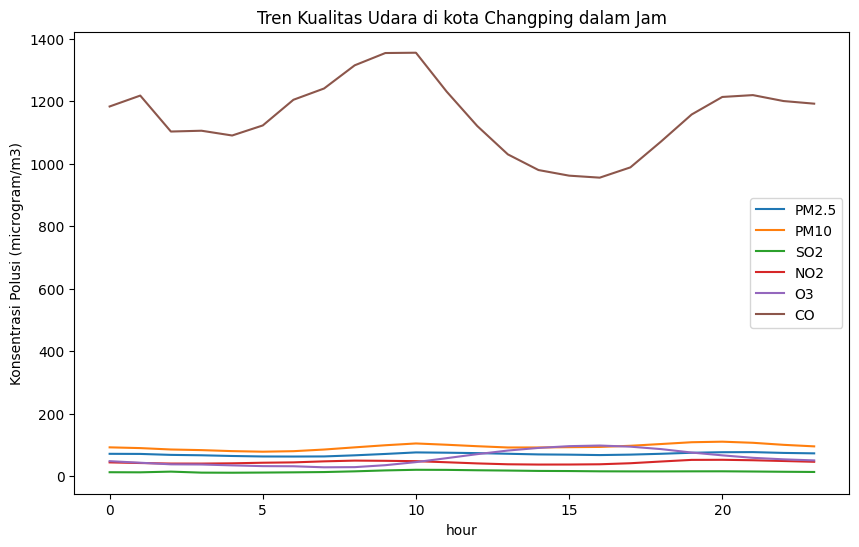

In [51]:
Jam_df = changping_df.groupby("hour").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Jam_df.index, Jam_df["PM2.5"], label="PM2.5")
plt.plot(Jam_df.index,Jam_df["PM10"], label="PM10")
plt.plot(Jam_df.index, Jam_df["SO2"], label="SO2")
plt.plot(Jam_df.index, Jam_df["NO2"], label="NO2")
plt.plot(Jam_df.index, Jam_df["O3"], label="O3")
plt.plot(Jam_df.index, Jam_df["CO"], label="CO")
plt.xlabel("hour")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di kota Changping dalam Jam")
plt.legend()
plt.show()

Nilai CO terlalu besar sehingga dibuat plot tren yang terpisah dan ini juga berlanjut untuk visualisasi selanjutnnya

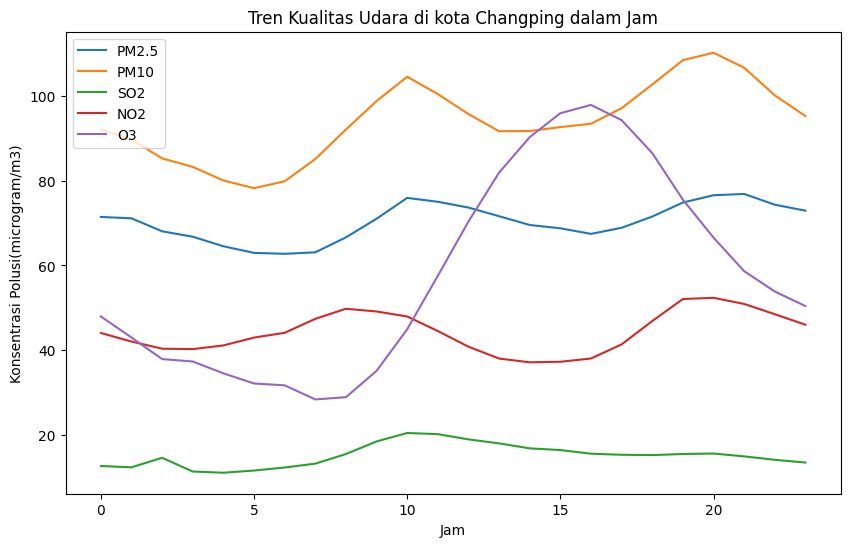

In [46]:
Jam_df = changping_df.groupby("hour").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Jam_df.index, Jam_df["PM2.5"], label="PM2.5")
plt.plot(Jam_df.index,Jam_df["PM10"], label="PM10")
plt.plot(Jam_df.index, Jam_df["SO2"], label="SO2")
plt.plot(Jam_df.index, Jam_df["NO2"], label="NO2")
plt.plot(Jam_df.index, Jam_df["O3"], label="O3")
plt.xlabel("Jam")
plt.ylabel("Konsentrasi Polusi(microgram/m3)")
plt.title("Tren Kualitas Udara di kota Changping dalam Jam")
plt.legend()
plt.show()

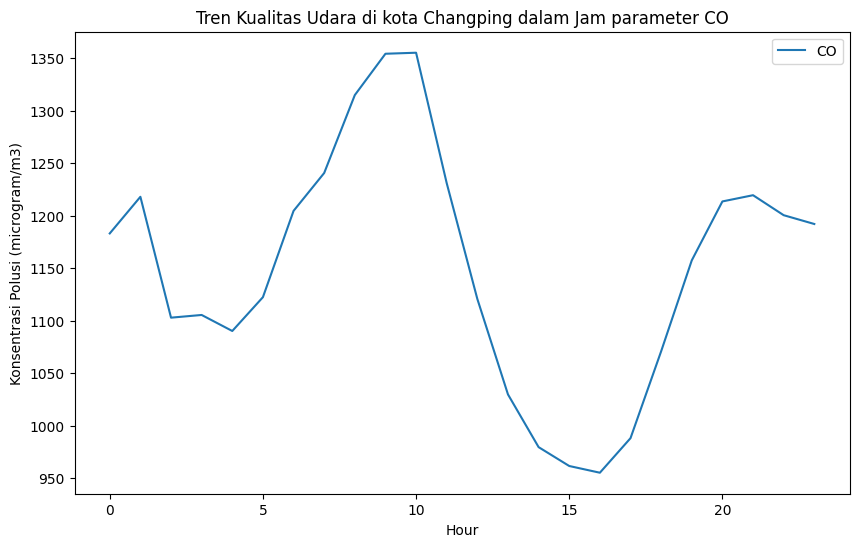

In [53]:
#tren nilai CO
Jam_df = changping_df.groupby("hour").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Jam_df.index, Jam_df["CO"], label="CO")
plt.xlabel("Hour")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di kota Changping dalam Jam parameter CO")
plt.legend()
plt.show()

Kualitas udara di kota changping berdasarkan jam cukup stabil. Kualitas udara paling buruk karena trennya naik saat jam 10 dan jam 20 dan Kualitas udara paling baik pada jam 3 dan 15 karena banyak tren yang menurun saat berada di selang waktu ini.

### Pertanyaan 2: Pada hari atau tanggal berapa nilai kualitas udara terbaik dan terburuk ? berikan tren

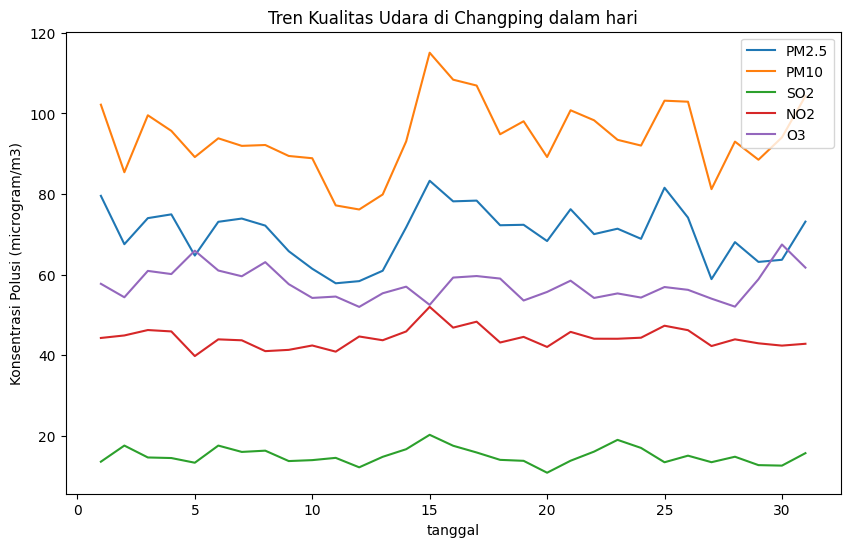

In [64]:
Hari_df = changping_df.groupby("day").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Hari_df.index, Hari_df["PM2.5"], label="PM2.5")
plt.plot(Hari_df.index, Hari_df["PM10"], label="PM10")
plt.plot(Hari_df.index, Hari_df["SO2"], label="SO2")
plt.plot(Hari_df.index, Hari_df["NO2"], label="NO2")
plt.plot(Hari_df.index, Hari_df["O3"], label="O3")
plt.xlabel("tanggal")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di Changping dalam hari")
plt.legend()
plt.show()

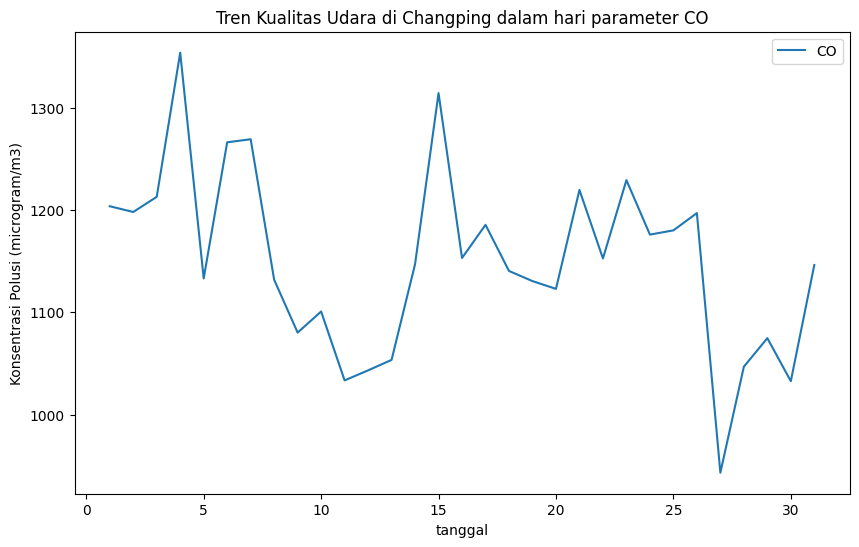

In [55]:
Hari_df = changping_df.groupby("day").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Hari_df.index, Hari_df["CO"], label="CO")
plt.xlabel("tanggal")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di Changping dalam hari parameter CO")
plt.legend()
plt.show()

Untuk Tren Udara perhari terlihat cukup stabil dana ada indikasi untuk menurun. Namun untuk hari ke 15 terlihat trennya naik dan menunjukkan bahwa pada hari itu adalah hari/tanggal dengan tingkat polusi paling tinggi sedangkan pada tanggal 27 kebanyakan trennya turun ke paling kecil menunjukkan bahwa pada tanggal 27 memiliki nilai polusi udara paling sedikit artinya kualitas udara nya baik.

### Pertanyaan 3 : Pada bulan berapa nilai kualitas udara terbaik dan terburuk ? berikan tren

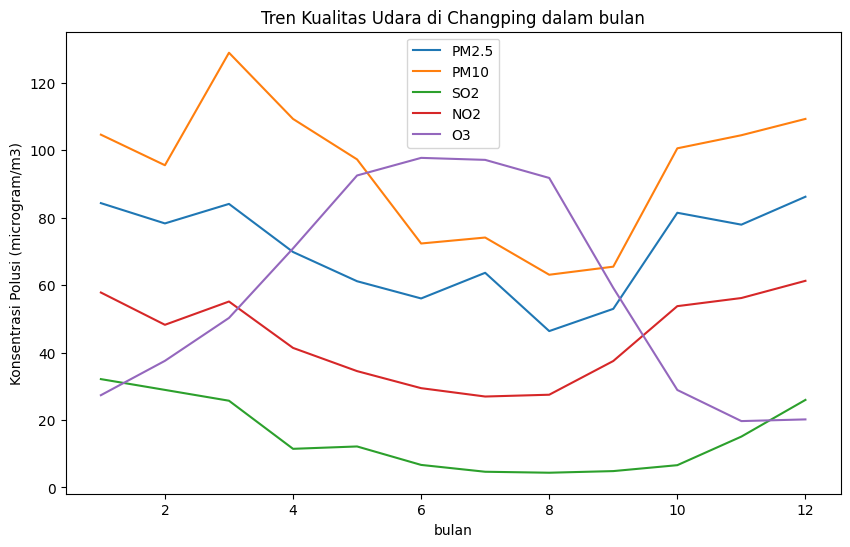

In [68]:
Bulan_df = changping_df.groupby("month").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Bulan_df.index, Bulan_df["PM2.5"], label="PM2.5")
plt.plot(Bulan_df.index, Bulan_df["PM10"], label="PM10")
plt.plot(Bulan_df.index, Bulan_df["SO2"], label="SO2")
plt.plot(Bulan_df.index, Bulan_df["NO2"], label="NO2")
plt.plot(Bulan_df.index, Bulan_df["O3"], label="O3")
plt.xlabel("bulan")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di Changping dalam bulan")
plt.legend()
plt.show()

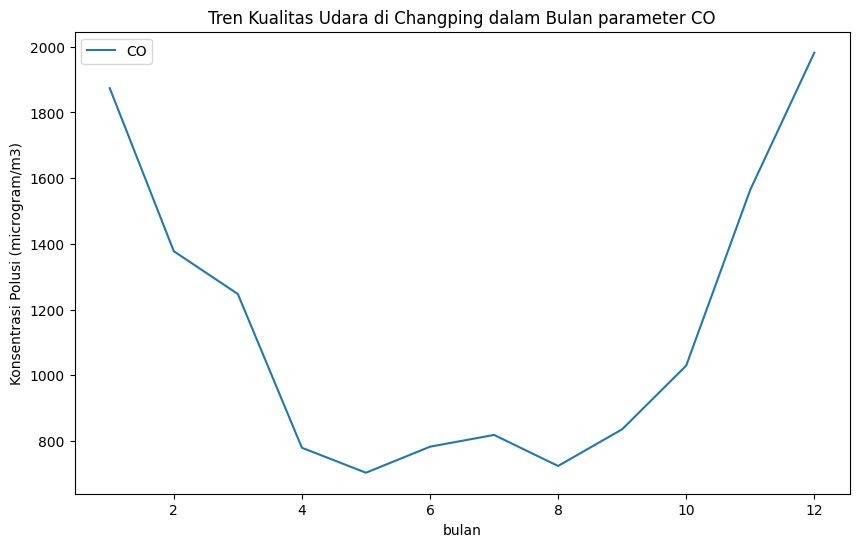

In [69]:
Bulan_df = changping_df.groupby("month").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(Bulan_df.index, Bulan_df["CO"], label="CO")
plt.xlabel("bulan")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di Changping dalam Bulan parameter CO")
plt.legend()
plt.show()

Dari plot berdasarkan bulan, terlihat trennya naik turun dari awal turun sampai menyentuh titik terendah sekitar di bulan 8 yang berarti pada bulan 8 kualitas udaranya paling baik kecuali parameter emisi O3 yang berbeda sendiri untuk trennya, setelah menyentuh bulan 8 trennya naik kembali. Kualitas udara memburuk di bulan januari atau bulan 1 dan bulan ke 3 dan naik kembali di bulan 12

### Pertanyaan 4 :Tahun berapa yang memiliki kualiatas udara paling baik ? Berikan tren

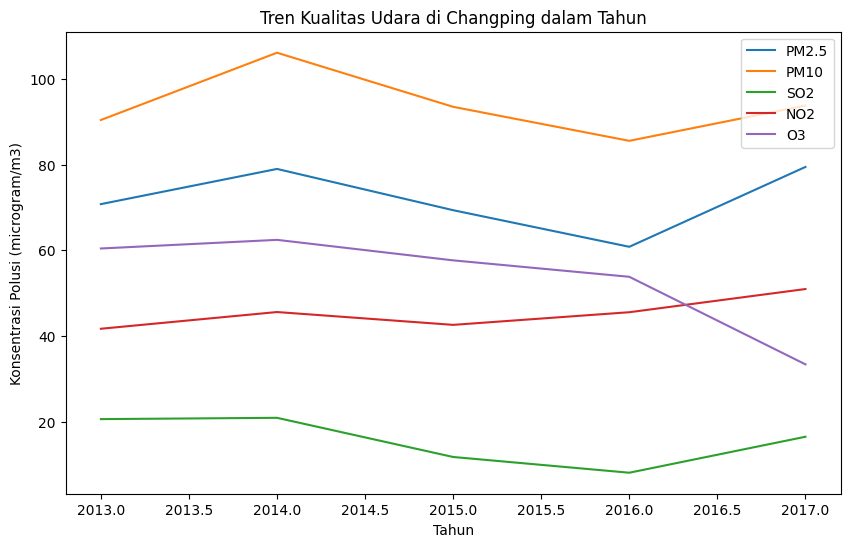

In [70]:
Tahun_df = changping_df.groupby("year").mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(Tahun_df.index, Tahun_df["PM2.5"], label="PM2.5")
plt.plot(Tahun_df.index, Tahun_df["PM10"], label="PM10")
plt.plot(Tahun_df.index, Tahun_df["SO2"], label="SO2")
plt.plot(Tahun_df.index, Tahun_df["NO2"], label="NO2")
plt.plot(Tahun_df.index, Tahun_df["O3"], label="O3")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di Changping dalam Tahun")
plt.legend()
plt.show()

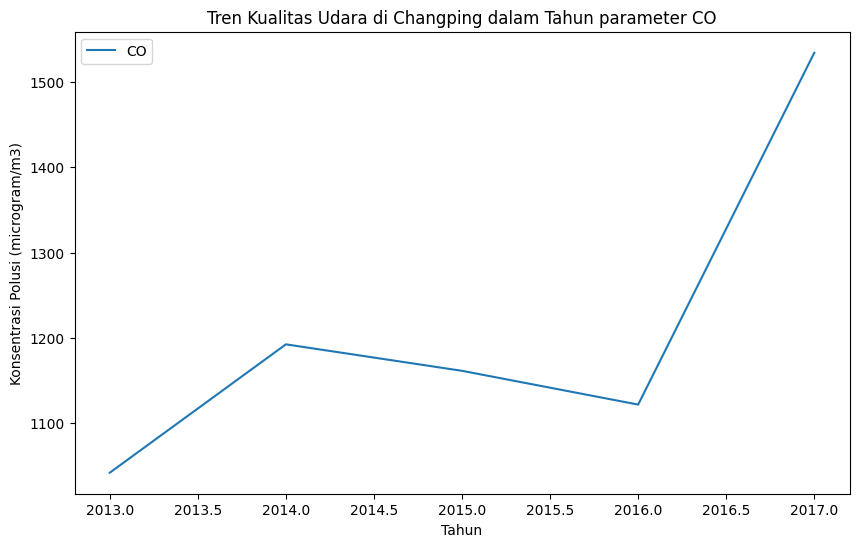

In [72]:
Tahun_df = changping_df.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(Tahun_df.index, Tahun_df["CO"], label="CO")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Polusi (microgram/m3)")
plt.title("Tren Kualitas Udara di Changping dalam Tahun parameter CO")
plt.legend()
plt.show()

Kebanyakan tren lumayan stabil dan tren kualitas udara kebanyakan tertinggi di tahun 2014 dan 2017 menandakan bahwa pada tahun tersebut kualitas udaranya buruk dan paling rendah kebanyakan pada tahun 2016 menandakan bahwa pada tahun itu kualitas udaranya paling baik

### Pertanyaan 5 : Bagaimana korelasi anatara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan parameter meterologi seperti suhu, tekanan,dewp, hujan, wd, dan wspm?

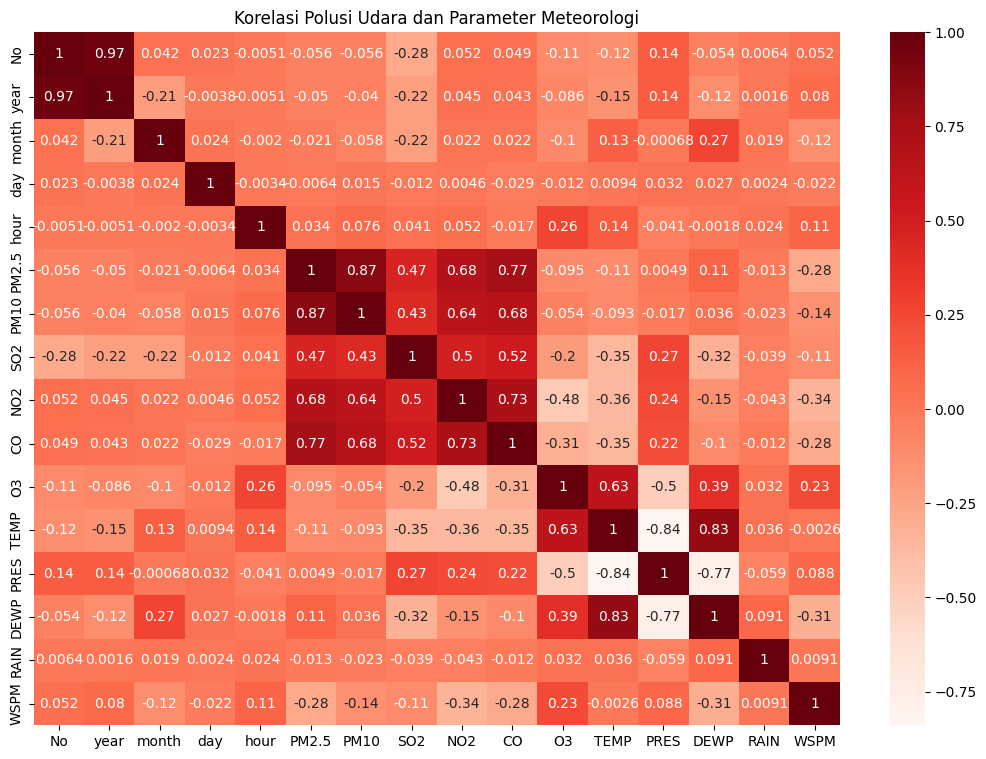

In [74]:
plt.figure(figsize=(13,9))

sns.heatmap(changping_df.corr(numeric_only = True),cmap=plt.cm.Reds,annot=True)
plt.title("Korelasi Polusi Udara dan Parameter Meteorologi")
plt.show()

Dari plot korelasi diatas terlihat bahwa seluruh parameter mempengaruhi satu sama lain menandakan adanya korelasi antara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan parameter meterologi seperti suhu, tekanan,dewp, hujan, wd, dan wspm, baik itu korelasi secara positif maupun negatif yang menandakan apabila Polusi udara dapat meningkat dan menurun sesuai dengan nilai parameter meteorologi

## Conclusion



- Conclution pertanyaan 1 : Kualitas udara di kota changping berdasarkan jam cukup stabil. Kualitas udara paling buruk karena trennya naik saat jam 10 dan jam 20 dan Kualitas udara paling baik pada jam 3 dan 15 karena banyak tren yang menurun saat berada di selang waktu ini.
- Conclution pertanyaan 2 : Untuk Tren Udara perhari terlihat cukup stabil dana ada indikasi untuk menurun. Namun untuk hari ke 15 terlihat trennya naik dan menunjukkan bahwa pada hari itu adalah hari/tanggal dengan tingkat polusi paling tinggi sedangkan pada tanggal 27 kebanyakan trennya turun ke paling kecil menunjukkan bahwa pada tanggal 27 memiliki nilai polusi udara paling sedikit artinya kualitas udara nya baik.
- Conclution pertanyaan 3 : Dari plot berdasarkan bulan, terlihat trennya naik turun dari awal turun sampai menyentuh titik terendah sekitar di bulan 8 yang berarti pada bulan 8 kualitas udaranya paling baik kecuali parameter emisi O3 yang berbeda sendiri untuk trennya, setelah menyentuh bulan 8 trennya naik kembali. Kualitas udara memburuk di bulan januari atau bulan 1 dan bulan ke 3 dan naik kembali di bulan 12
- Conlcution pertanyaan 4 : Kebanyakan tren lumayan stabil dan tren kualitas udara kebanyakan tertinggi di tahun 2014 dan 2017 menandakan bahwa pada tahun tersebut kualitas udaranya buruk dan paling rendah kebanyakan pada tahun 2016 menandakan bahwa pada tahun itu kualitas udaranya paling baik.
- Conlcution pertanyaan 5 : seluruh parameter mempengaruhi satu sama lain menandakan adanya korelasi antara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan parameter meterologi seperti suhu, tekanan,dewp, hujan, wd, dan wspm, baik itu korelasi secara positif maupun negatif yang menandakan apabila Polusi udara dapat meningkat dan menurun sesuai dengan nilai parameter meteorologi

In [77]:
changping_df.to_csv("changping.csv", index=False)
